# Programa Ingenias+ Data Science

En esta notebook, vamos a demostrar como funcionan los algoritmos vistos en clase y su implementación en Scikit-learn.

# Regresión Lineal

Vamos a empezar generando unos datos para mostrar unos ejemplos

In [1]:
# Importamos librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

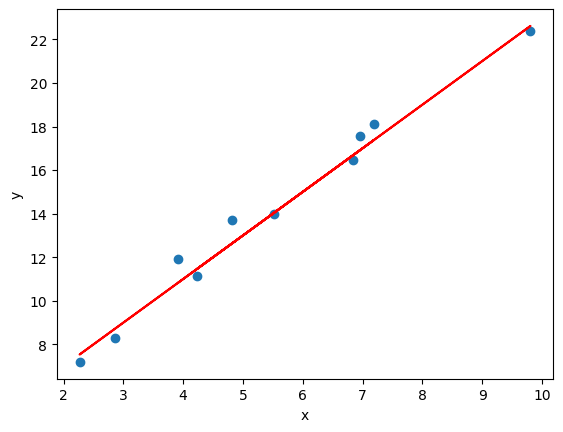

In [2]:
# Creamos datos que sigan una recta
np.random.seed(123)
a = 2
b = 3
x = np.random.rand(10)*10
y = a*x+b + np.random.randn(10)*0.5
plt.scatter(x,y)
plt.plot(x, a*x+b, 'r')
plt.xlabel('x');
plt.ylabel('y');

In [3]:
x

array([6.96469186, 2.86139335, 2.26851454, 5.51314769, 7.1946897 ,
       4.2310646 , 9.80764198, 6.84829739, 4.80931901, 3.92117518])

In [4]:
# Transformamos en una fila para cada valor, los modelos esperan una matriz de entrada con una fila que represente una muestra.
# Cada columna representa una característica (feature)
x.reshape(-1,1)

array([[6.96469186],
       [2.86139335],
       [2.26851454],
       [5.51314769],
       [7.1946897 ],
       [4.2310646 ],
       [9.80764198],
       [6.84829739],
       [4.80931901],
       [3.92117518]])

La búsqueda de un modelo que describa el comportamiento de nuestros datos parte del supuesto de que existe una relación o función matemática subyacente que los relaciona. Nuestro trabajo es encontrar esa función.
Para eso vamos a usar la librería Scikit-Learn

In [5]:
from sklearn.linear_model import LinearRegression

In [6]:
# Instanciamos el modelo
lr = LinearRegression()

In [7]:
# Le pedimos que encuentre los parámetros que mejor se ajustan a nuestros datos
lr.fit(x.reshape(-1,1), y)

LinearRegression()

Veamos qué encontró

In [8]:
# Imprimimos la pendiente
lr.coef_

array([2.02565598])

In [9]:
# Imprimimos la ordenada al origen
lr.intercept_

np.float64(3.0600038699795835)

Esto significa que la recta encontrada es $$y = 2.02565598 · x + 3.0600038699795835$$

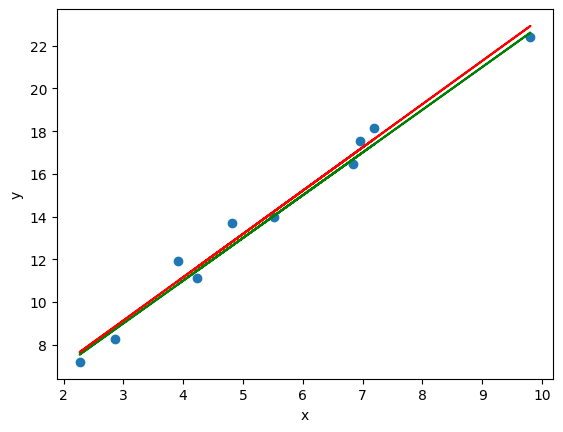

In [10]:
np.random.seed(123)
# y real
a = 2
b = 3
x = np.random.rand(10)*10
y = a*x + b + np.random.randn(10)*0.5
y_real = a*x + b
# y predicha
a_p = lr.coef_
b_p = lr.intercept_
y_predicted = a_p * x + b_p
plt.scatter(x, y)
plt.plot(x, y_real, 'green')
plt.plot(x, y_predicted, 'r')
plt.xlabel('x');
plt.ylabel('y');

# Regresión Logística

Vamos a entrenar un modelo para poder clasificar una observación en una categoría según sus características.



Armemos un dataset de juguete

In [11]:
from sklearn.datasets import make_classification

In [12]:
X, y = make_classification(n_samples = 200,
                           n_features=2,
                           n_informative= 2,
                           n_redundant=0,
                           n_clusters_per_class=2,
                           flip_y = 0.15,
                           random_state=8)

Veamos qué datos obtuvimos

In [13]:
X = pd.DataFrame(X, columns=['x1', 'x2'])
X.head()

,x1,x2
0,-1.189053,-0.648235
1,-1.368230,-0.072432
2,-1.876199,0.345642
3,0.018895,2.690086
4,-1.383127,1.197926


In [14]:
y = pd.Series(y, name='Clase')
y.sample(10)

,Clase
163,1
157,1
61,1
197,1
91,0
73,1
85,0
81,1
111,1
114,0


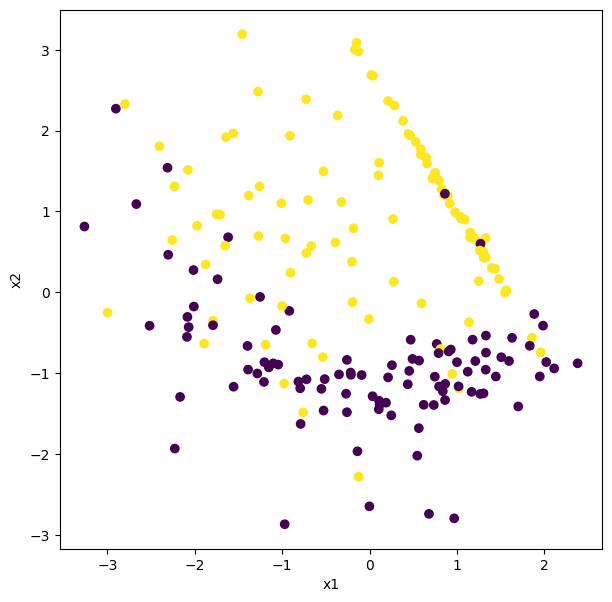

In [15]:
plt.figure(figsize=(7,7))
plt.scatter(X['x1'], X['x2'], c = y)
plt.xlabel('x1')
plt.ylabel('x2')
xlim = plt.xlim()
ylim = plt.ylim()

El objetivo ahora es poder clasificar las observaciones, es decir determinar el color del punto, en función de sus parámetros.

In [16]:
# Importamos la clase
from sklearn.linear_model import LogisticRegression

In [17]:
# Instanciamos el clasificador
lr = LogisticRegression(penalty=None, solver='saga')

In [18]:
# Entrenamos el modelo
lr.fit(X,y)

LogisticRegression(penalty=None, solver='saga')

Veamos qué encontró.

In [19]:
lr.coef_

array([[0.33258278, 1.95345755]])

In [20]:
lr.intercept_

array([0.26322812])

In [21]:
ejex = np.linspace(X['x1'].min(), X['x1'].max(), num=2)
ejey = -(lr.coef_[0][0]*ejex + lr.intercept_)/lr.coef_[0][1]

Grafiquemos el umbral de decisión.

(-3.171503680070779, 3.4958314570705675)

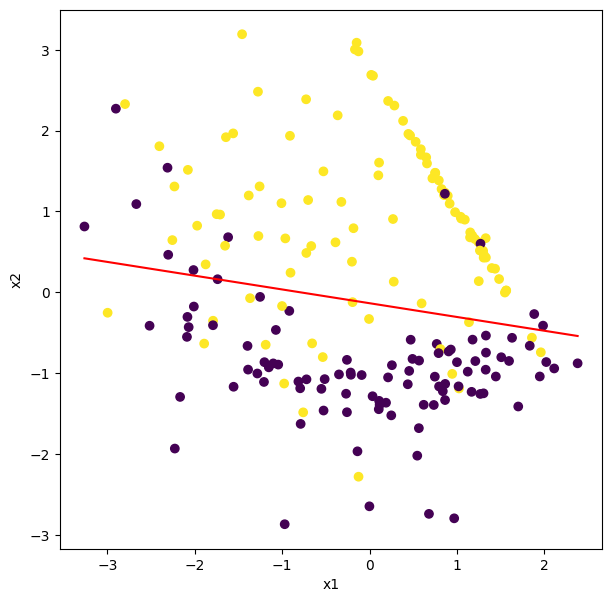

In [22]:
plt.figure(figsize=(7,7))
plt.scatter(X['x1'], X['x2'], c = y)
plt.xlabel('x1')
plt.ylabel('x2')
plt.plot(ejex, ejey, 'r')
plt.xlim(xlim)
plt.ylim(ylim)

In [23]:
y_pred = lr.predict(X)

In [24]:
y.values

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 0])

In [25]:
y_pred

array([0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1])

Complejizemos el modelo agregando nuevas features. En este caso agregaremos $x_2^2$

In [26]:
X['x2_cuadrado'] = X['x2']**2
X.head()

,x1,x2,x2_cuadrado
0,-1.189053,-0.648235,0.420209
1,-1.368230,-0.072432,0.005246
2,-1.876199,0.345642,0.119468
3,0.018895,2.690086,7.236562
4,-1.383127,1.197926,1.435027


Volvemos a entrenar el modelo

In [27]:
lr.fit(X,y)

LogisticRegression(penalty=None, solver='saga')

In [28]:
lr.coef_

array([[ 0.33547813,  1.99201125, -0.25183127]])

Veamos cómo cambió el umbral de decisión.

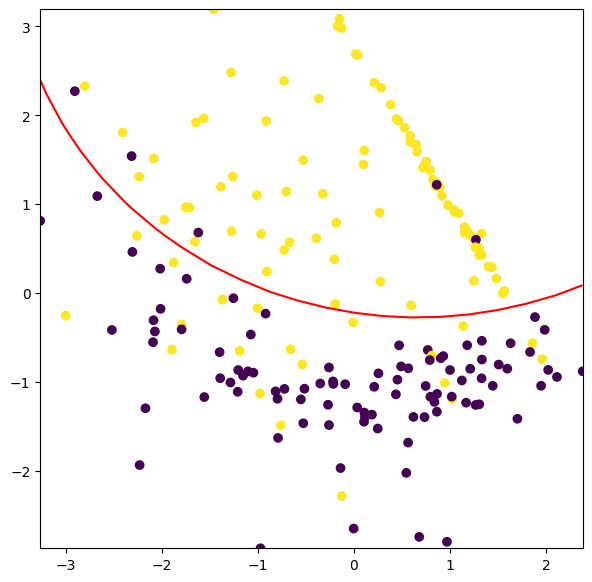

In [29]:
plt.figure(figsize=(7,7))
x1 = np.linspace(X['x1'].min(), X['x1'].max(), 20)
x2 = np.linspace(X['x2'].min(), X['x2'].max(), 20)
x1, x2 = np.meshgrid(x1,x2)
F = lr.coef_[0][0]*x1 + lr.coef_[0][1]*x2 + lr.coef_[0][2]*x1**2 + lr.coef_[0][2]*x2**2+ lr.intercept_
plt.contour(x1,x2,F,[0],colors= 'r')
plt.scatter(X['x1'], X['x2'], c = y)